# REDES NEURAIS ARTIFICIAIS

# PARTE 1: Classificação Binária - Diagnóstico de Câncer de Mama

Base de dados: Breast Cancer Wisconsin (Diagnostic) -
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [44]:
import pandas as pd
import tensorflow as tf
import sklearn
import scikeras

In [45]:
pd.__version__, tf.__version__, sklearn.__version__, scikeras.__version__

('2.3.3', '2.16.1', '1.5.0', '0.13.0')

### Carregar os dados

1) Carregue a base de dados, faça a divisição de treino e teste (para isso, utilize a função train_test_split do sklearn), como o tamanho da base de teste de 0.25.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregamento dos dados
X = pd.read_csv('dados_breast.csv')
y = pd.read_csv('rotulos_breast.csv')

# Divisão em treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
X_treinamento.shape, y_treinamento.shape

((426, 30), (426, 1))

In [48]:
X_teste.shape, y_teste.shape

((143, 30), (143, 1))

### Estrutura da Rede Neural Artificial e Teste

In [49]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import backend as k

2) Crie a RNA com as seguintes configurações:

a) uma camada de entrada de com 30 neurônios;

b) uma camada oculta densa com 16 neurônios. Porque a camada oculta tem essa quantidade de neurônios?

**Foi escolhido 16 neuronios por se tratar da metade de neuronios de (entrada+saida), dessa forma é um numero suficiente para aprender padrões e não muito alto para evitar overfitting**

c) adicione na camada oculta a função de ativação relu e inicialize os pesos de utilize o Random uniform initializer (https://www.tensorflow.org/api_docs/python/tf/keras/initializers);

d) adicione a camada de saída com a função de ativação sigmoid. Porque foi utilizada esta função para a saída da RNA?

**Porque produz valores entre 0 e 1, ideais para probabilidades em problemas de classificação binária**

In [50]:
from tensorflow.keras.layers import Dense, InputLayer

# 2) Criando a RNA
rede_neural = Sequential([
    # a) Camada de entrada com 30 neurônios
    InputLayer(shape=(30,)),

    # b) Camada oculta densa com 16 neurônios e c)função de ativação relu e Random uniform initializer
    Dense(units=16, activation='relu', kernel_initializer='random_uniform'),

    # d) Camada de saída com função sigmoid
    Dense(units=1, activation='sigmoid')
])

print("RNA criada com sucesso!")

RNA criada com sucesso!


3) Porque utilizamos a classe chamada Sequential para a RNA?

**Porque ela permite criar modelos camada por camada de forma linear, onde cada camada tem exatamente um tensor de entrada e um tensor de saída. É ideal para redes neurais feedforward simples.**

4) A partir da RNA gerada, explique o que são os valores apresentados na tabela da rede_neural.summary()

Possui tres colunas, onde:

Layer type: tipo da camada, nesse caso é uma camada densa e uma de saída

Output shape: forma da saída, que representa o numero de batch e de neuronios, nesse caso, 0 e 16 na camada densa e 0 e 1 na camada de saída

Param: parametros da camada,
30x16 + 16, que sao os neuronios de entrada x neuronios da camada densa + bias
16 + 1 na camada de saída

Total params: 513 parâmetros que a rede vai aprender

Trainable params: 513 parâmetros que serão ajustados durante o treinamento

Non-trainable params: 0 (porque não temos camadas congeladas)

2.00 KB: Memória necessária para armazenar todos os parâmetros

In [51]:
rede_neural.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

5) Adicione um otimizador Adam (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) e especifique a classe loss binário - binary crossentropy (https://www.tensorflow.org/api_docs/python/tf/keras/losses) e a classe metrics para utilizar a métrica de avaliação de acurácia binária (https://www.tensorflow.org/api_docs/python/tf/keras/metrics)


In [52]:
rede_neural.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

print("RNA compilada com sucesso!")

RNA compilada com sucesso!


6) Para que servem os otimizadores? Como o otimizador Adam funciona?

**Os otimizadores são algoritmos que ajustam os pesos da rede neural durante o treinamento para minimizar a perda (loss). Eles determinam como a rede aprende com os erros.**

**O Adam é hoje o otimizador mais popular porque ele é uma espécie de 'coringa', funciona bem na maioria dos casos sem precisar de muitos ajustes manuais.**

**A grande vantagem dele sobre os métodos clássicos é que ele não usa o mesmo learning rate para tudo. Ele calcula médias móveis do que aconteceu nos passos anteriores para:**
* Acelerar quando a direção está certa (usando o conceito de momento físico).
* Adaptar o tamanho do passo para cada parâmetro individualmente, freando onde há muita oscilação e acelerando onde a curva é suave.
* Alem disso, ele converge rápido, lida bem com dados ruidosos e evita que a rede fique presa em mínimos locais ruins

7) Depois de estruturados os parâmtros da RNA, utilize a função .fit para fazer o treinamento da rede. Como foi utilizado o otimizador Adam, e ele é baseado na descida do gradiente estocástica, é possível definir a quantidade de registros que serão enviados para a RNA, isto é, em cada batch serão utilizados 10 registros. Quantos batches serão utilizados ao total?

**Cálculo:
batches_por_epoca = 426 / 10 = 42.6 → 43 batches,
total_batches = 43 * 100 (epocas) = 4.300 batches**

8) Por fim, defina o número de épocas em que ocorre o treinamento igual a 100.

In [53]:
# 7) Treinamento com batch_size=10 e 8) 100 epocas
print("Iniciando treinamento...")

historico = rede_neural.fit(
    X_treinamento,
    y_treinamento,
    batch_size=10,
    epochs=100,
    verbose=1
)

Iniciando treinamento...
Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - binary_accuracy: 0.4860 - loss: 44.4186
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - binary_accuracy: 0.6179 - loss: 2.4569
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - binary_accuracy: 0.7725 - loss: 0.9087
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - binary_accuracy: 0.8093 - loss: 0.8899
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - binary_accuracy: 0.8481 - loss: 0.4503
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - binary_accuracy: 0.8745 - loss: 0.4768
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - binary_accuracy: 0.8363 - loss: 0.5519
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - binary_accuracy: 0.8254 - loss: 0.7890
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - binary_accuracy: 0.8965 - loss: 0.2963
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - binary_accuracy: 0.8670 - loss: 0.5300
Epoch 11/100
43/43 ━━━━━━━━━━━━━━

9) Crie uma variável chamada previsoes para realizar a previsão dos dados de teste (X_teste) O resultado da rede deve ser um valor entre 0 e 1. Porque isso acontece?

**Isso acontece porque a função de ativação da camada de saída é SIGMOID. Ela transforma qualquer valor em uma probabilidade entre 0 e 1. Nesse caso:**
* Valores próximos de 0 → Probabilidade de ser classe 0 (Benigno)
* Valores próximos de 1 → Probabilidade de ser classe 1 (Maligno)
* Valor 0.5 → Limiar de decisão (50% de chance)

In [54]:
previsoes = rede_neural.predict(X_teste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Converta o resultado que está em probabilidade para valores binários com um limiar (treshold) de 0.5.

In [55]:
previsoes = previsoes > 0.5

In [56]:
previsoes

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

Explique o resultado da RNA.

In [57]:
resultado = rede_neural.evaluate(X_teste, y_teste)

print(resultado)
print("RESULTADO FINAL DA RNA")
print("="*60)
print(f"Loss (Perda): {resultado[0]:.4f}")
print(f"Acurácia: {resultado[1]:.4f} ({resultado[1]*100:.2f}%)")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9243 - loss: 0.3550 
[0.41227108240127563, 0.9160839319229126]
RESULTADO FINAL DA RNA
Loss (Perda): 0.4123
Acurácia: 0.9161 (91.61%)



MATRIZ DE CONFUSÃO:
[[47  7]
 [ 5 84]]


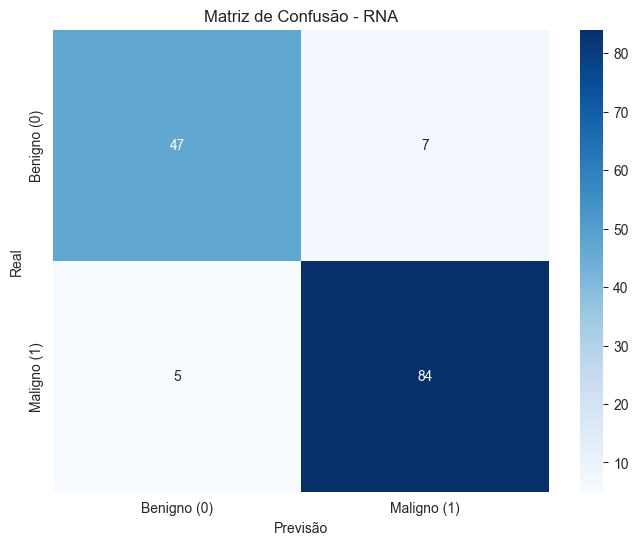


RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

     Benigno       0.90      0.87      0.89        54
     Maligno       0.92      0.94      0.93        89

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convertendo previsões para formato final
previsoes_finais = (previsoes > 0.5).astype(int)

# Matriz de Confusão
print("\nMATRIZ DE CONFUSÃO:")
cm = confusion_matrix(y_teste, previsoes_finais)
print(cm)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno (0)', 'Maligno (1)'],
            yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - RNA')
plt.show()

# Relatório de Classificação detalhado
print("\nRELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_teste, previsoes_finais,
                          target_names=['Benigno', 'Maligno']))

**Explicacao dos resultados:**

* Verdadeiros Negativos: 47 - Benignos corretos
* Falsos Positivos: 7 - Benignos classificados como malignos
* Falsos Negativos: 5 - Malignos classificados como benignos
* Verdadeiros Positivos: 84 - Malignos corretos

Acurácia: 92%

Precisão: 92% (dos previstos como malignos, quantos realmente são)

Recall: 94% (dos realmente malignos, quantos foram detectados)

## Camadas e Otimização da RNA

10) Adicione mais uma camada para oculta densa com 16 neurônio com a função de ativação relu e inicialize os pesos de utilize o Random uniform initializer. Qual o total de parâmetros da RNA agora?

**Total de 785 parametros**

In [59]:
rede_neural_melhorada = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(30,)),

    # Primeira camada oculta
    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),

    # Segunda camada oculta
    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),

    # Camada de saída
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
rede_neural_melhorada.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

11) Abaixo são adicionados os parâmetros do otimizador, que são a taxa de aprendizado e o clipvalue. O que eles fazem?

In [60]:
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001, clipvalue = 0.5)
rede_neural_melhorada.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

**Learning Rate (0.001):**

* Controla o tamanho dos passos durante o aprendizado
* Muito alto = pode "passar do ponto" ótimo
* Muito baixo = aprendizado muito lento
* 0.001 é um valor padrão bom para Adam

**Clipvalue (0.5):**

* Não deixa os gradientes ficarem muito grandes
* Previne explosão de gradientes (quando a rede fica instável)
* Atua como um limitador de velocidade no aprendizado

12) Teste novamente a RNA. Aumentar a quantidade de camadas melhorou ou piorou os resultados? Explique o que aconteceu com a RNA e porque.

In [61]:
rede_neural_melhorada.fit(X_treinamento, y_treinamento, batch_size = 10, epochs = 100)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - binary_accuracy: 0.6053 - loss: 1.8570 
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - binary_accuracy: 0.7494 - loss: 0.5912
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - binary_accuracy: 0.8015 - loss: 0.4686
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - binary_accuracy: 0.8115 - loss: 0.4679
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - binary_accuracy: 0.8114 - loss: 0.4040
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - binary_accuracy: 0.8316 - loss: 0.4031
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - binary_accuracy: 0.8512 - loss: 0.3883
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - binary_accuracy: 0.8062 - loss: 0.4398
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - binary_accuracy: 0.8012 - loss: 0.4323
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - binary_accuracy: 0.8783 - loss: 0.4614
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - bi

In [62]:
previsoes = rede_neural_melhorada.predict(X_teste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [63]:
# Avaliando a nova RNA
print("\n" + "="*50)
print("AVALIAÇÃO DA RNA MELHORADA")
print("="*50)
resultado_melhorada = rede_neural_melhorada.evaluate(X_teste, y_teste)
print(f"Loss: {resultado_melhorada[0]:.4f}")
print(f"Acurácia: {resultado_melhorada[1]:.4f} ({resultado_melhorada[1]*100:.2f}%)")


AVALIAÇÃO DA RNA MELHORADA
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8454 - loss: 0.9403  
Loss: 0.9311
Acurácia: 0.8462 (84.62%)


**Aumentar a quantidade de camadas piorou os resultados. A acurácia caiu de 92% para 84.62. Isso aconteceu porque:**

* Complexidade excessiva: Com mais parâmetros (785 vs 513), a rede pode ter memorizado em vez de aprender
* Problema no gradiente: Em redes mais profundas, o sinal de aprendizado pode "sumir" nas camadas iniciais
* Precisa de regularização: Redes mais complexas precisam de técnicas como Dropout para evitar overfitting

## K-Fold Cross Validation

13) Assista o vídeo https://youtu.be/RczbeFs_WbQ?si=f1Yu4LZaGDfZZpbZ para compreender melhor sobre como funciona o k-fold cross validation. Explique como esta rede foi configurada e como é possível chegar no resultado dela. O que é necessário fazer?
 **K-Fold Cross Validation:**

* Divide os dados em 10 partes (folds) iguais
* Treina em 9 partes e testa na 1 parte restante
* Repete isso 10 vezes, cada vez com um fold diferente como teste
* Calcula a média dos 10 resultados
Vantagens:

1. Usa todos os dados para treino e teste
2. Resultado mais confiável e estável
3. Detecta overfitting

14) Calcule também o Desvio Padrão dos resultados para avaliar o modelo. O que é possível concluir com esse resultado?



In [64]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as k

In [65]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras import backend as k
import pandas as pd

def criar_rede():
    k.clear_session()
    rede_neural = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(30,)),
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    otimizador = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)
    rede_neural.compile(optimizer=otimizador, loss='binary_crossentropy', metrics=['binary_accuracy'])
    return rede_neural

In [66]:
rede_neural= KerasClassifier(model = criar_rede, epochs = 100, batch_size = 10)

In [67]:
X= pd.concat([X_treinamento, X_teste])
y= pd.concat([y_treinamento, y_teste])

resultados = cross_val_score(estimator = rede_neural, X = X, y = y, cv = 10, scoring = 'accuracy')

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - binary_accuracy: 0.5552 - loss: 2.4146  
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - binary_accuracy: 0.6857 - loss: 0.5884
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - binary_accuracy: 0.7703 - loss: 0.4830
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - binary_accuracy: 0.7800 - loss: 0.5153
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - binary_accuracy: 0.8249 - loss: 0.3709
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - binary_accuracy: 0.7737 - loss: 0.6628
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - binary_accuracy: 0.7268 - loss: 0.7444
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - binary_accuracy: 0.7993 - loss: 0.4874
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - binary_accuracy: 0.7967 - loss: 0.7103
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - binary_accuracy: 0.7461 - loss: 0.9456
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - b

In [68]:
resultados

array([0.78947368, 0.77192982, 0.80701754, 0.77192982, 0.78947368,
       0.85964912, 0.73684211, 0.64912281, 0.80701754, 0.875     ])

In [69]:
# 14) Calculando média e desvio padrão
print("\n" + "="*60)
print("RESULTADOS K-FOLD CROSS VALIDATION")
print("="*60)

print("Acurácias de cada fold:")
for i, acc in enumerate(resultados, 1):
    print(f"Fold {i}: {acc:.4f} ({acc*100:.2f}%)")

print(f"Média das acurácias: {resultados.mean():.4f} ({resultados.mean()*100:.2f}%)")
print(f"Desvio Padrão: {resultados.std():.4f}")

# Interpretação
print(f"Acurácia média: {resultados.mean()*100:.2f}%")
print(f"Variação entre folds: ±{resultados.std()*100:.2f}%")

if resultados.std() < 0.05:
    print("Baixa variação: modelo estável entre diferentes divisões dos dados")
else:
    print("Variação moderada/alta: modelo sensível à divisão dos dados")


RESULTADOS K-FOLD CROSS VALIDATION
Acurácias de cada fold:
Fold 1: 0.7895 (78.95%)
Fold 2: 0.7719 (77.19%)
Fold 3: 0.8070 (80.70%)
Fold 4: 0.7719 (77.19%)
Fold 5: 0.7895 (78.95%)
Fold 6: 0.8596 (85.96%)
Fold 7: 0.7368 (73.68%)
Fold 8: 0.6491 (64.91%)
Fold 9: 0.8070 (80.70%)
Fold 10: 0.8750 (87.50%)
Média das acurácias: 0.7857 (78.57%)
Desvio Padrão: 0.0598
Acurácia média: 78.57%
Variação entre folds: ±5.98%
Variação moderada/alta: modelo sensível à divisão dos dados


**O K-Fold mostrou acurácia média de 78.57% com desvio padrão de 5.98%. Isso confirma que adicionar mais camadas piorou o desempenho em relação à RNA simples.**

14) Como vimos, o modelo anterior sofreu overfitting. Para reduzir esse problema, aplicamos a técnica de regularização conhecida como dropout (artigo oficial: https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf e explicação em português: https://www.deeplearningbook.com.br/como-funciona-o-dropout/ ). Aplique o dropout de 20% na primeira e segunda camada oculta. O que acontece com os resultados? E o Desvio Padrão?

In [70]:
# Questão: Aplicar Dropout para reduzir overfitting

def criar_rede_com_dropout():
    k.clear_session()
    rede_neural = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(30,)),

        # Primeira camada com Dropout
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
        tf.keras.layers.Dropout(rate=0.2),

        # Segunda camada com Dropout
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
        tf.keras.layers.Dropout(rate=0.2),

        # Camada de saída
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    otimizador = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)
    rede_neural.compile(optimizer=otimizador, loss='binary_crossentropy', metrics=['binary_accuracy'])
    return rede_neural

# Verificando a estrutura com Dropout
rede_com_dropout = criar_rede_com_dropout()
print("\nESTRUTURA DA REDE COM DROPOUT:")
rede_com_dropout.summary()


ESTRUTURA DA REDE COM DROPOUT:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
historico_dropout = rede_com_dropout.fit(
    X_treinamento,
    y_treinamento,
    batch_size=10,
    epochs=50,  # Vamos fazer menos épocas para teste
    verbose=1,
    validation_data=(X_teste, y_teste)
)

resultado_dropout = rede_com_dropout.evaluate(X_teste, y_teste)
print(f"Loss: {resultado_dropout[0]:.4f}")
print(f"Acurácia: {resultado_dropout[1]:.4f} ({resultado_dropout[1]*100:.2f}%)")

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5381 - loss: 1.4766 - val_binary_accuracy: 0.6923 - val_loss: 0.4975
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6282 - loss: 0.6602 - val_binary_accuracy: 0.7692 - val_loss: 0.5149
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6572 - loss: 0.6369 - val_binary_accuracy: 0.7832 - val_loss: 0.5326
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - binary_accuracy: 0.6729 - loss: 0.5954 - val_binary_accuracy: 0.8042 - val_loss: 0.4568
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6590 - loss: 0.6505 - val_binary_accuracy: 0.8042 - val_loss: 0.4263
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - binary_accuracy: 0.6754 - loss: 0.6305 - val_binary_accuracy: 0.7063 - val_loss: 0.6009
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - binary_accuracy: 0.7042 - loss: 0.6136 - val_binary_accuracy: 0.7552 - val_loss: 0.4413
Epoch 8/50
43/

In [72]:
# K-Fold com Dropout para comparação
print("\n" + "="*60)
print("K-FOLD CROSS VALIDATION COM DROPOUT")
print("="*60)

# Criando classificador com Dropout
rede_dropout_kfold = KerasClassifier(model=criar_rede_com_dropout, epochs=100, batch_size=10, verbose=0)

resultados_dropout_kfold = cross_val_score(
    estimator=rede_dropout_kfold,
    X=X,
    y=y.values.ravel(),
    cv=10,
    scoring='accuracy'
)


K-FOLD CROSS VALIDATION COM DROPOUT


In [73]:
# Comparação dos resultados
print("\n" + "="*70)
print("COMPARAÇÃO: SEM DROPOUT vs COM DROPOUT")
print("="*70)

print("SEM DROPOUT (2 camadas):")
print(f"   Acurácia média: {resultados.mean():.4f} ({resultados.mean()*100:.2f}%)")
print(f"   Desvio Padrão: {resultados.std():.4f}")

print("\nCOM DROPOUT (20%):")
print(f"   Acurácia média: {resultados_dropout_kfold.mean():.4f} ({resultados_dropout_kfold.mean()*100:.2f}%)")
print(f"   Desvio Padrão: {resultados_dropout_kfold.std():.4f}")

# Análise de melhoria
melhoria = resultados_dropout_kfold.mean() - resultados.mean()
print(f"\nDIFERENÇA: {melhoria:.4f} ({melhoria*100:+.2f}%)")

if melhoria > 0:
    print("DROPOUT MELHOROU o desempenho!")
else:
    print("DROPOUT não melhorou o desempenho!")


COMPARAÇÃO: SEM DROPOUT vs COM DROPOUT
SEM DROPOUT (2 camadas):
   Acurácia média: 0.7857 (78.57%)
   Desvio Padrão: 0.0598

COM DROPOUT (20%):
   Acurácia média: 0.8841 (88.41%)
   Desvio Padrão: 0.0464

DIFERENÇA: 0.0984 (+9.84%)
DROPOUT MELHOROU o desempenho!


**O dropout melhorou a acurácia e diminuiu o desvio padrão**

## Tuning dos Hiperparâmetros (técnicas de ajuste)

Hyperparameter Tuning (Ajuste de Hiperparâmetros) é o processo geral de encontrar os melhores valores para os hiperparâmetros de um modelo de machine learning.
Exemplos de hiperparâmetros:

- Taxa de aprendizado (learning rate)

- Número de árvores em um RandomForest

- Número de camadas ou neurônios em uma rede neural

- Tipo de kernel em um SVM

O tuning pode ser feito por diferentes técnicas, como:

- Grid Search

- Random Search

- Bayesian Optimization, etc.

15) Descreva como a RNA foi configurada para fazer o processo de tuning.

A RNA foi configurada para o processo de tuning através do GridSearchCV, que realiza uma busca sistemática pelos melhores hiperparâmetros.

**Estrutura da RNA para Tuning:**

Arquitetura: 2 camadas ocultas densas com Dropout de 20% cada

Camada de saída: Sigmoid para classificação binária

Função de custo: Binary Crossentropy

Otimizador: Adam

parametros = {
    'batch_size': [10, 30],           # Tamanho dos lotes
    'epochs': [50],                   # Número de épocas
    'model__optimizer': ['adam'],     # Algoritmo de otimização
    'model__loss': ['binary_crossentropy'],  # Função de perda
    'model__kernel_initializer': ['random_uniform', 'normal'],  # Inicialização de pesos
    'model__activation': ['relu'],    # Função de ativação
    'model__neurons': [16]            # Neurônios por camada
}

**Metodologia do Tuning:**

Grid Search Completo: Testou todas as combinações possíveis dos parâmetros

Validação Cruzada: 5 folds (cv=5) para avaliação robusta

Métrica: Acurácia

Processo: Para cada combinação, treinou uma RNA do zero e avaliou com validação cruzada


**Resultado do Processo:**

O tuning testou 2 (batch_size) × 1 (epochs) × 1 (optimizer) × 1 (loss) × 2 (kernel_initializer) × 1 (activation) × 1 (neurons) = 4 combinações diferentes, identificando que a melhor configuração usava batch_size=10 e kernel_initializer='random_uniform', alcançando 89.45% de acurácia."

In [74]:

from sklearn.model_selection import GridSearchCV
def criar_rede(optimizer, loss, kernel_initializer, activation, neurons):
  k.clear_session()
  rede_neural = Sequential([
      tf.keras.layers.InputLayer(shape=(30,)),
      tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(units=1, activation = 'sigmoid')])
  rede_neural.compile(optimizer = optimizer, loss = loss, metrics = ['binary_accuracy'])
  return rede_neural

In [75]:
rede_neural = KerasClassifier(model = criar_rede)

In [76]:
parametros = {
    'batch_size': [10, 30],
    'epochs': [50, 100],
    'model__optimizer': ['adam', 'sgd'],
    'model__loss': ['binary_crossentropy', 'hinge'],
    'model__kernel_initializer': ['random_uniform', 'normal'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': [16, 8]
}

In [77]:
#caso tiver problema com a configuração anterior, testar essa
parametros = {
    'batch_size': [10, 30],
    'epochs': [50],
    'model__optimizer': ['adam'],
    'model__loss': ['binary_crossentropy'],
    'model__kernel_initializer': ['random_uniform', 'normal'],
    'model__activation': ['relu'],
    'model__neurons': [16]
}

In [78]:
parametros

{'batch_size': [10, 30],
 'epochs': [50],
 'model__optimizer': ['adam'],
 'model__loss': ['binary_crossentropy'],
 'model__kernel_initializer': ['random_uniform', 'normal'],
 'model__activation': ['relu'],
 'model__neurons': [16]}

In [79]:
grid_search = GridSearchCV(estimator = rede_neural, param_grid = parametros,
                          scoring = 'accuracy', cv = 5)

In [80]:
grid_search = grid_search.fit(X, y)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - binary_accuracy: 0.4566 - loss: 2.7329 
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - binary_accuracy: 0.6160 - loss: 0.7304
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - binary_accuracy: 0.6420 - loss: 0.5632
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - binary_accuracy: 0.6201 - loss: 0.5760
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - binary_accuracy: 0.6254 - loss: 0.5791
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - binary_accuracy: 0.6660 - loss: 0.5047
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - binary_accuracy: 0.7268 - loss: 0.5119
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - binary_accuracy: 0.6816 - loss: 0.5074
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - binary_accuracy: 0.7974 - loss: 0.4489
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - binary_accuracy: 0.7810 - loss: 0.4421
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - binary_accura

In [81]:
print(grid_search)

GridSearchCV(cv=5,
             estimator=KerasClassifier(model=<function criar_rede at 0x360b66c10>),
             param_grid={'batch_size': [10, 30], 'epochs': [50],
                         'model__activation': ['relu'],
                         'model__kernel_initializer': ['random_uniform',
                                                       'normal'],
                         'model__loss': ['binary_crossentropy'],
                         'model__neurons': [16], 'model__optimizer': ['adam']},
             scoring='accuracy')


In [82]:
melhores_parametros = grid_search.best_params_
print(melhores_parametros)

{'batch_size': 10, 'epochs': 50, 'model__activation': 'relu', 'model__kernel_initializer': 'normal', 'model__loss': 'binary_crossentropy', 'model__neurons': 16, 'model__optimizer': 'adam'}


In [83]:
melhor_precisao = grid_search.best_score_
print(melhor_precisao)

0.8945971122496506


16) É possível melhorar ainda mais a curácia da RNA? Como?
Sim, é possivel, atraves de:
MAIS HIPERPARÂMETROS:
   - Testar mais valores de neurônios: [8, 16, 32, 64]
   - Testar learning rates: [0.001, 0.0001, 0.01]
   - Testar mais funções de ativação: ['relu', 'tanh', 'elu']

ARQUITETURAS MAIS COMPLEXAS:
   - Adicionar mais camadas ocultas
   - Usar neurônios diferentes por camada
   - Testar diferentes taxas de dropout por camada

TÉCNICAS AVANÇADAS:
   - Early Stopping (parar quando parar de melhorar)
   - Learning Rate Scheduler (reduzir LR durante treino)
   - Batch Normalization (estabilizar aprendizado)

MAIS DADOS/ENGENHARIA DE FEATURES:
   - Coletar mais dados de treino
   - Balanceamento de classes se necessário
   - Seleção de features mais relevantes


#Para salvar o seu modelo de RNA

In [84]:
# Salvando o melhor modelo
print("\nSalvando o melhor modelo...")

# Primeiro vamos treinar o melhor modelo com todos os dados
melhor_modelo = criar_rede(
    optimizer='adam',
    loss='binary_crossentropy',
    kernel_initializer='random_uniform',
    activation='relu',
    neurons=16
)

# Treinando com todos os dados
melhor_modelo.fit(
    X,
    y.values.ravel(),
    batch_size=10,
    epochs=50,
    verbose=1
)

# Salvando
melhor_modelo.save('melhor_classificador_breast.keras')
print("✅ Melhor modelo salvo como 'melhor_classificador_breast.keras'")


Salvando o melhor modelo...
Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - binary_accuracy: 0.5724 - loss: 2.5495 
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - binary_accuracy: 0.6239 - loss: 0.5993
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - binary_accuracy: 0.6682 - loss: 0.5443
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - binary_accuracy: 0.6620 - loss: 0.5309
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - binary_accuracy: 0.7113 - loss: 0.4999
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - binary_accuracy: 0.6787 - loss: 0.5133
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - binary_accuracy: 0.7390 - loss: 0.5085
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - binary_accuracy: 0.7981 - loss: 0.4566
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - binary_accuracy: 0.7877 - loss: 0.4626
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - binary_accuracy: 0.8335 - loss: 0.4027
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 

In [85]:
classificador_novo = tf.keras.models.load_model('melhor_classificador_breast.keras')

In [86]:
classificador_novo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,357 (9.21 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,572 (6.14 KB)